In [33]:
import sys
import os
os.chdir('/home/douwei/Recon-1ton/Recon1tonSim')

import tables
import numpy as np


filepath = './result'
data = []
Run = []
data_column = np.zeros((0,0))

E_total = [];
taud_total = []
x_total =[]
y_total =[]
z_total =[]


for dir in os.walk(filepath):
    for files in dir[2]:
        h = tables.open_file(os.path.join(filepath,files))
        recondata = h.root.Recon
        E = recondata[:]['E_sph']
        E_total = np.hstack((E_total, E))
        taud = recondata[:]['tau_d']
        taud_total = np.hstack((taud_total, taud))
        x = recondata[:]['x_sph']
        x_total = np.hstack((x_total, x))
        y = recondata[:]['y_sph']
        y_total = np.hstack((y_total, y))
        z = recondata[:]['z_sph']
        z_total = np.hstack((z_total, z))
        h.close()
a = [E_total, taud_total, x_total, y_total, z_total]
data.append(a)

/home/douwei/Recon-1ton/Recon1tonSim


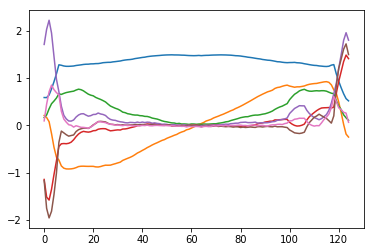

In [34]:
print(os.getcwd())
import h5py
import matplotlib.pyplot as plt
filename = '/home/douwei/Recon-1ton/calib/logs/c1.8.h5'
h = h5py.File('../calib/coeff/c1.8.h5','r')
coeff = h['coeff'][...]
plt.plot(coeff)
plt.show()

(131, 7, 6)
../calib/logs/c0.8.h5
../calib/logs/c1.0.h5
../calib/logs/c1.2.h5
../calib/logs/c1.5.h5
../calib/logs/c1.8.h5
../calib/logs/c2.0.h5
1.8


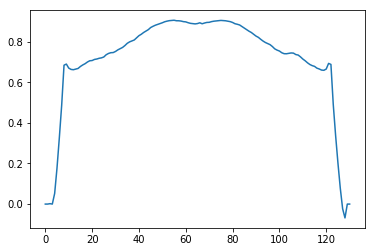

In [35]:
import Readlog
logs, radius, coeff = Readlog.coeff3d()
print(logs[-2])
plt.plot(coeff[:,0,-2])
coeff_corr = coeff[:,0,-2]
plt.show()

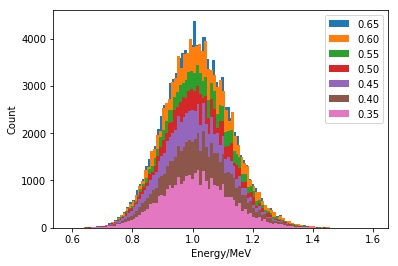

In [60]:
r = np.sqrt(data[0][2]**2+data[0][3]**2+data[0][4]**2)
E = data[0][0]
import matplotlib.pyplot as plt
plt.figure(1)
for i in np.arange(0.65,0.3,-0.05):
    plt.hist(data[0][0][(r<i) & (E>0.3) & (E<1.6)],bins=100)
plt.legend(["0.65","0.60","0.55","0.50","0.45","0.40","0.35"])
plt.xlabel('Energy/MeV')
plt.ylabel('Count')
plt.show()

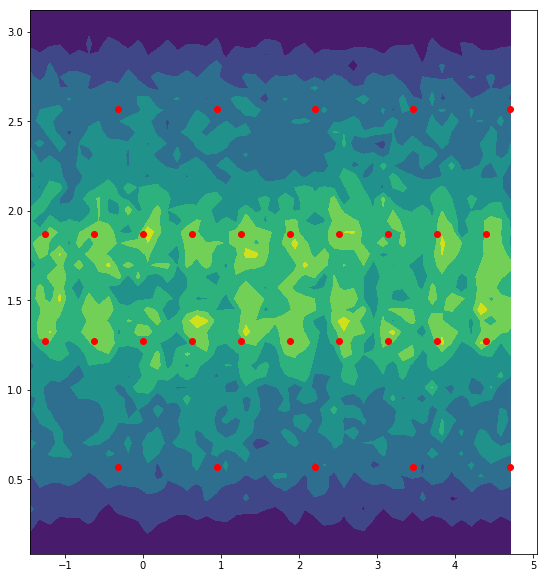

In [42]:
run_No = 0
x1 = data[run_No][2]
y1 = data[run_No][3]
z1 = data[run_No][4]

r1 = np.sqrt(x1**2 + y1**2 + z1**2)

theta1 = np.arccos(z1/(r1+1e-4))

phi1 = np.arctan(y1/(x1+1e-4)) + (x1>0)*np.pi


def ReadPMT():
    f = open(r"./PMT1t.txt")
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos
PMT_pos = ReadPMT()

%matplotlib inline
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
H1, xedges, yedges = np.histogram2d(phi1, theta1, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H1))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))),\
           c='red')
plt.show()

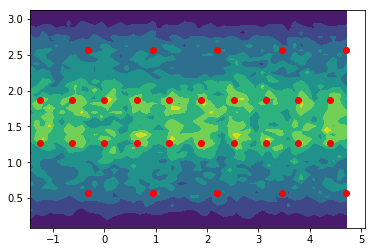

In [44]:
fig = plt.figure()
H1, xedges, yedges = np.histogram2d(phi1[r1>0.01], theta1[r1>0.01], bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H1))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))),\
           c='red')
plt.show()

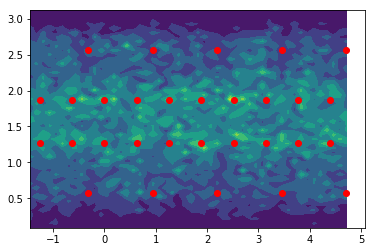

In [46]:
fig = plt.figure()
H1, xedges, yedges = np.histogram2d(phi1[(r1<0.4)&(r1>0.35)], theta1[(r1<0.4)&(r1>0.35)], bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H1))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))),\
           c='red')
plt.show()

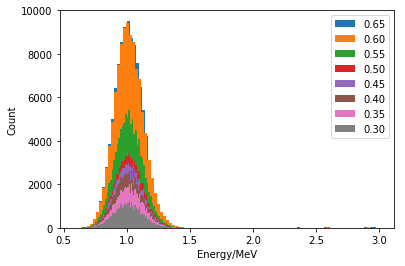

In [50]:
run_No = 0
r = np.sqrt(data[run_No][2]**2+data[run_No][3]**2+data[run_No][4]**2)
r[r>=0.65]=0.65
E = data[run_No][0]
'''
from scipy.interpolate import interp1d
xx = radius
f = interp1d(xx[:], coeff_corr, kind='cubic')
E_interp = f(r)
E = E + E_interp
'''
import matplotlib.pyplot as plt
plt.figure(1)
for i in np.arange(0.7,0.3,-0.05):
    plt.hist(E[(r<i) & (E>0.3) & (E<3)],bins=100)
plt.legend(["0.65","0.60","0.55","0.50","0.45","0.40","0.35","0.30"])
plt.xlabel('Energy/MeV')
plt.ylabel('Count')
plt.show()

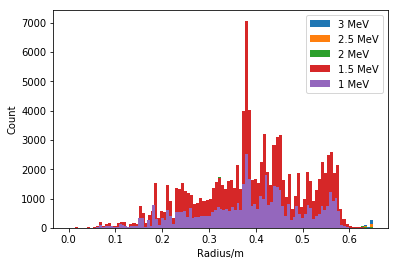

In [55]:
run_No = 0
r = np.sqrt(data[run_No][2]**2+data[run_No][3]**2+data[run_No][4]**2)
r[r>=0.65]=0.65
E = data[run_No][0]
'''
from scipy.interpolate import interp1d
xx = radius
f = interp1d(xx[:], coeff_corr, kind='cubic')
E_interp = f(r)
E = E + E_interp
'''
import matplotlib.pyplot as plt
plt.figure(1)
for i in np.arange(3,0.5,-0.5):
    plt.hist(r[(E<i)],bins=100)
plt.legend(["3 MeV","2.5 MeV","2 MeV","1.5 MeV","1 MeV","0.5 MeV"])
plt.xlabel('Radius/m')
plt.ylabel('Count')
plt.show()

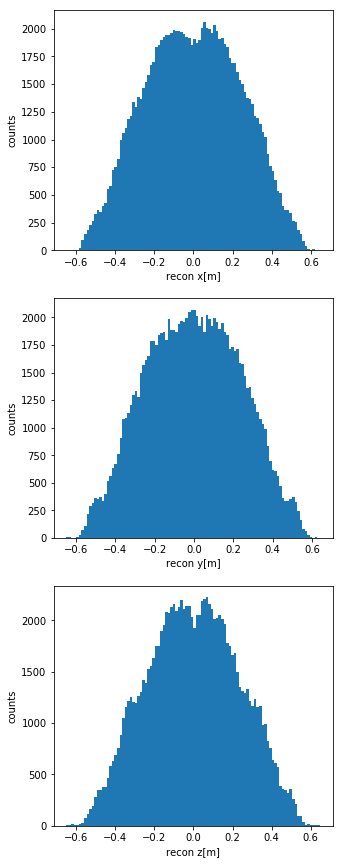

In [57]:
run_No = 0
r = np.sqrt(data[run_No][2]**2+data[run_No][3]**2+data[run_No][4]**2)
plt.figure(figsize=(5,15))
plt.subplot(3,1,1)
plt.hist(data[run_No][2],bins=100)
plt.xlabel('recon x[m]')
plt.ylabel('counts')
plt.subplot(3,1,2)
plt.hist(data[run_No][3],bins=100)
plt.xlabel('recon y[m]')
plt.ylabel('counts')
plt.subplot(3,1,3)
plt.hist(data[run_No][4],bins=100)
plt.xlabel('recon z[m]')
plt.ylabel('counts')
plt.show()

0 True


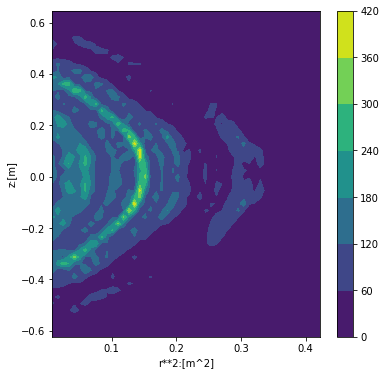

In [59]:
plt.figure(figsize = (6,6))

r1 = data[run_No][2]**2 + data[run_No][3]**2
z_new = data[run_No][4]

print(np.sum(r1>0.7),np.sum(z_new)>0.7)
H1, xedges, yedges = np.histogram2d(r1, z_new, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
# plt.contourf(X,Y,np.log(np.transpose(H1)+1))
plt.contourf(X,Y,np.transpose(H1))
plt.xlabel('r**2:[m^2]')
plt.ylabel('z:[m]')
plt.colorbar()
plt.show()